# Week 5 Seminar Answers

## Question 1

In [1]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-18,58.647499,59.395000,58.572498,59.102501,58.521858,97433600
1,2019-10-21,59.380001,60.247501,59.330002,60.127499,59.536781,87247200
2,2019-10-22,60.290001,60.549999,59.904999,59.990002,59.400635,82293600
3,2019-10-23,60.525002,60.810001,60.305000,60.794998,60.197727,75828800
4,2019-10-24,61.127499,61.200001,60.452499,60.895000,60.296741,69275200


## Question 2

In [2]:
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.01734263119260517,
 -0.002286754468636852,
 0.013418913787706129,
 0.0016448129345482418,
 0.012316320711263571]

In [3]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.01719396415460897,
 -0.002289373084486049,
 0.013329677579711534,
 0.0016434617112236506,
 0.012241091898278138]

In [4]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.81200881 and its annulized volatility is 0.45029406


In [5]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.70989120 and its annulized volatility is 0.45062897


## Question 3

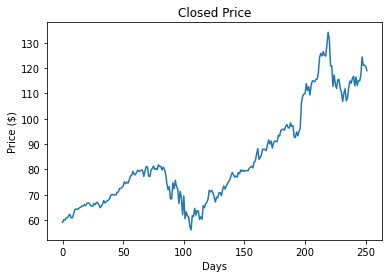

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

## Question 4

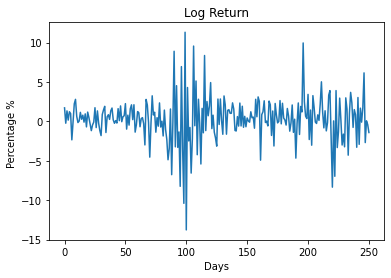

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

## Question 6


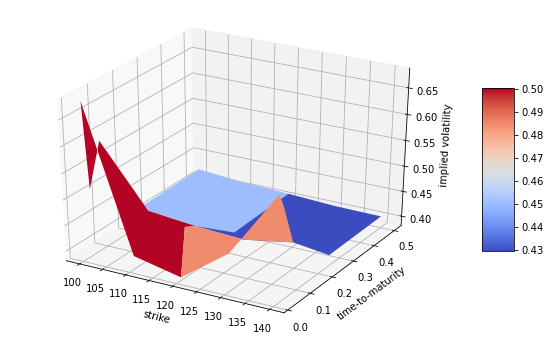

In [8]:
strike = np.array([100, 110, 120, 130, 140])
ttm = np.array([1/52, 2/52, 1/12, 3/12, 6/12])
strike, ttm = np.meshgrid(strike, ttm)
v1 = np.array([0.680747215, 0.407514819, 0.387209381, 0.455492973, 0.586458559])
v2 = np.array([0.511163662, 0.483042132, 0.479582288, 0.496197363, 0.561138544])
v3 = np.array([0.590946469, 0.476712392, 0.467423537, 0.462411475, 0.478420730])
v4 = np.array([0.417853439, 0.411190413, 0.405015276, 0.401277285, 0.402179224])
v5 = np.array([0.420640473, 0.413022235, 0.409642081, 0.404944311, 0.403981802])
iv = np.array([v1, v2, v3, v4, v5])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5);

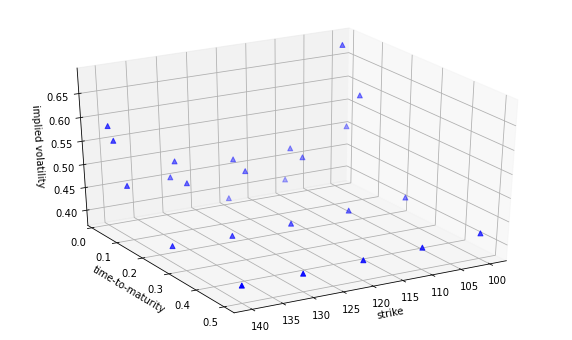

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25, c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility');